# Python versions timeline

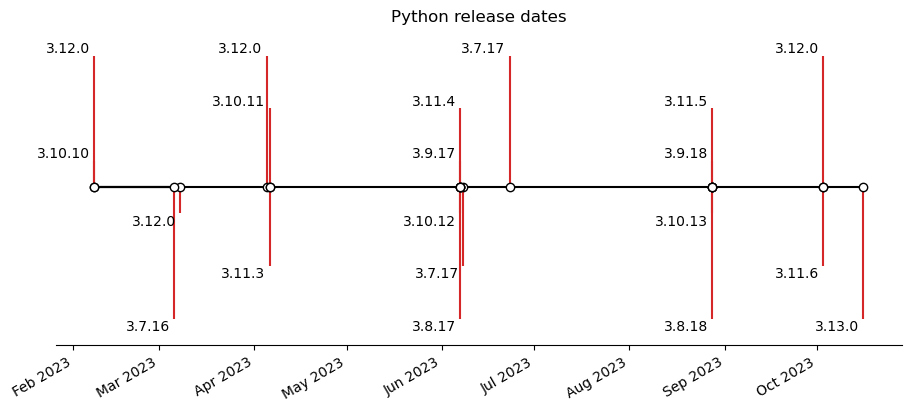

In [1]:
'''
    Description: This Python script fetches a list of Python release dates 
    from the GitHub API and visualizes them on a timeline using a stem plot. 
    If the data retrieval fails, it defaults to a predefined Python version 
    and release date. The script utilizes the datetime, matplotlib, and numpy 
    libraries for data handling and visualization. The stem plot represents 
    the release dates along with corresponding Python version names, providing 
    an informative timeline of Python releases.

'''

from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates

try:
    # Try to fetch a list of Python releases and their dates
    # from https://api.github.com/repos/actions/python-versions/releases
    import json
    import urllib.request
    
    url = 'https://api.github.com/repos/actions/python-versions/releases'
    data = json.loads(urllib.request.urlopen(url, timeout=1).read().decode())
    
    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split('T')[0])
            names.append(item['tag_name'].split('-')[0])
    # Convert date strings to datetime
    dates = [datetime.strptime(d, '%Y-%m-%d') for d in dates]
    
except Exception as e:
    names = ['3.13.0', '3.12.0', '3.11.6', '3.11.5', '3.10.13', 
             '3.9.18', '3.8.18', '3.7.17', '3.7.17', '3.11.4', 
             '3.10.12', '3.9.17', '3.8.17', '3.12.0', '3.11.3', 
             '3.10.11', '3.12.0', '3.10.10', '3.7.16', '3.12.0']

    dates = ['2023-10-16', '2023-10-03', '2023-10-03', '2023-08-28', 
             '2023-08-28', '2023-08-28', '2023-08-28', '2023-06-23', 
             '2023-06-08', '2023-06-07', '2023-06-07', '2023-06-07', 
             '2023-06-07', '2023-04-05', '2023-04-06', '2023-04-06', 
             '2023-03-08', '2023-02-08', '2023-03-06', '2023-02-08']
    
    dates = [datetime.strptime(d, '%Y-%m-%d') for d in dates]


# Choose levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                  int(np.ceil(len(dates)/6)))[:len(dates)]

# Create a figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(9, 4), layout='constrained')
ax.set(title='Python release dates')

ax.vlines(dates, 0, levels, color='tab:red') # The vertical stems.
ax.plot(dates, np.zeros_like(dates), '-o',
        color='k', markerfacecolor='w') # Baseline and markers on it

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)/3), textcoords='offset points',
                horizontalalignment='right',
                verticalalignment='bottom' if l > 0 else 'top')
                
# format x-axis with 1-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[['left', 'top', 'right']].set_visible(False)

ax.margins(y=0.1)
plt.show()